<a href="https://colab.research.google.com/github/smartosid/Git-github-tut/blob/main/autism_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### define our metrics function with plotting confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

### define function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {round(accuracy_score(y_test, y_hat_test),2)}')
    print(f'train accuracy: {round(accuracy_score(y_train, y_hat_train),2)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)

# Function to draw the feature importances

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

# Importing libraries

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report

# Classification
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score, roc_auc_score, roc_curve, auc, cohen_kappa_score


## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Obtain Data

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Toddler Autism dataset July 2018.csv")



# Explore Data

In [ ]:
df = df.rename(columns={'Class/ASD Traits ':'Class/ASD','Qchat-10-Score':'result'},inplace=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  result                  1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,result,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


# To know the dimension of our data

In [ ]:
df.shape

(1054, 19)

## This project was collected over one tousand fifty four patients and 18 features were used

# collecting stastical info  about our data

In [ ]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,result
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


### Displaying Columns

In [ ]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'result', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD'],
      dtype='object')

# Removing unwanted Coloumns

In [ ]:
df.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'result', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD'],
      dtype='object')

# Calculating the percentage of babies shows the symptoms of autisim


In [ ]:
# Calculating the percentage of babies shows the symptoms of autisim
yes_autism= df[df['Class/ASD']=='Yes']
no_autism= df[df['Class/ASD']=='No']

print("Toddlers:",round(len(yes_autism)/len(df) * 100,2))

print("Toddlers:",round(len(no_autism)/len(df) * 100,2))





Toddlers: 69.07
Toddlers: 30.93


In [ ]:
# Displaying the content of the target column
df['Class/ASD'].value_counts()

,count
Class/ASD,
Yes,728
No,326


### Pie plot the distribution of the target column

([<matplotlib.patches.Wedge at 0x7b7b3325c9a0>,
 [Text(-0.9910065639807614, -0.676687512923835, 'Autism: Yes'),
  Text(0.908422683649031, 0.620296886846849, 'Autism: No')],
 [Text(-0.5780871623221108, -0.39473438253890375, '69.1%'),
  Text(0.4955032819903805, 0.3383437564619176, '30.9%')])

(-1.186712874451758,
 1.1041285675324943,
 -1.1592092122680597,
 1.102819486298479)

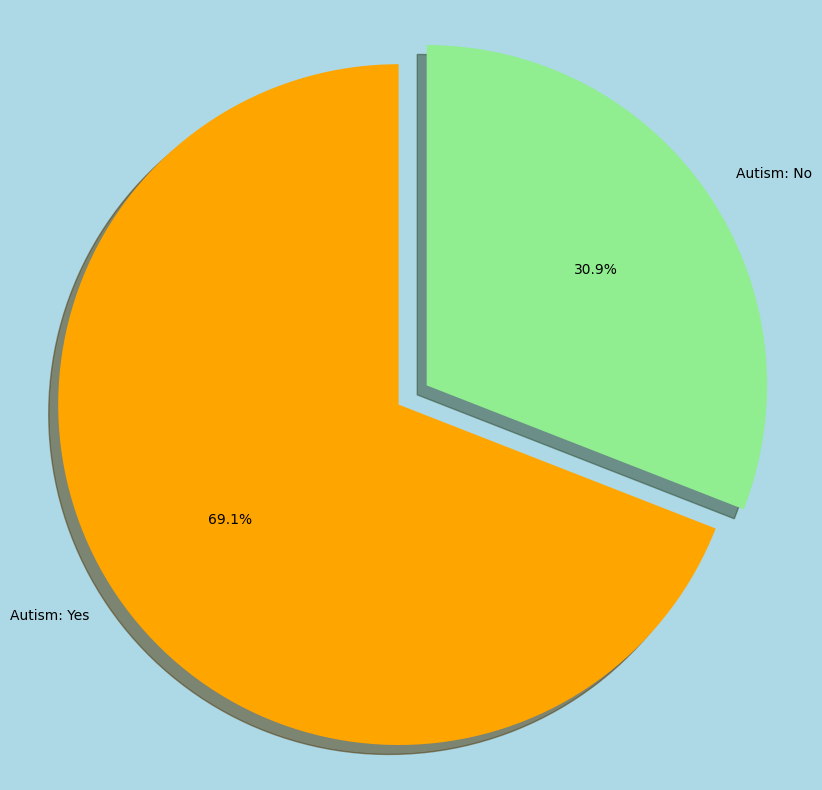

In [ ]:
import matplotlib.pyplot as plt

# Your existing code
fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.set_facecolor('lightblue')

# Define colors for each portion of the pie chart (change to your desired colors)
colors = ['orange', 'lightgreen']

# Your existing pie chart code with the 'colors' parameter added
plt.pie(df["Class/ASD"].value_counts(), labels=('Autism: Yes', 'Autism: No'), explode=[0.1, 0],
        autopct='%1.1f%%', shadow=True, startangle=90, labeldistance=1.1, colors=colors)
plt.axis('equal')

plt.show()


# Checking null data

In [ ]:
# Checking null data
df.isnull().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
result                 0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
Class/ASD              0
dtype: int64

# Checking the type of the data

In [ ]:
df.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
result                  int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD              object
dtype: object

## Investigating the correlation through plotting pearson method heatmap

In [ ]:
# corr = df.corr( )
# plt.figure(figsize = (15,15))
# sns.heatmap(data = corr, annot = True, square = True, cbar = True)


# Assuming df is your DataFrame
corr = df.corr()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Set the facecolor of the figure to light blue
fig.set_facecolor('lightblue')

# Plot the heatmap
sns.heatmap(data=corr, annot=True, square=True, cbar=True, cmap='coolwarm', ax=ax)

# Show the plot
plt.show()


ValueError: could not convert string to float: 'f'

# Interpreting the Heatmap of Correlation

The features in orange colour shows high correlation, we can see all the 10 answers from A1 to A9 except A10 are highly correlated with Qchart10-score. Therefore, it is better to remove the Qchat coloumn from our feature list because it is going to mislead our results.

###  Visualizing Juandice occurance in males and females

In [ ]:
# # Visualizing Juandice occurance in males and females
# plt.figure(figsize = (16,8))

# plt.style.use('dark_background')
# sns.countplot(x = 'Jaundice', hue = 'Sex', data = yes_autism)

# Assuming yes_autism is your DataFrame
plt.figure(figsize=(16, 8))

# Use a custom color palette (change to your desired colors)
custom_palette = {'m': 'white', 'f': 'pink'}

# Set a style (optional)
plt.style.use('dark_background')

# Plot the countplot with the custom palette
sns.countplot(x='Jaundice', hue='Sex', data=yes_autism, palette=custom_palette)

# Show the plot
plt.show()


<Figure size 1600x800 with 0 Axes>

NameError: name 'yes_autism' is not defined

<Figure size 1600x800 with 0 Axes>

### In Toddlers, autism is nearly 2 times in males having jundice than in  females.


# Visualizing The Q-chat 10 Score according to the gender

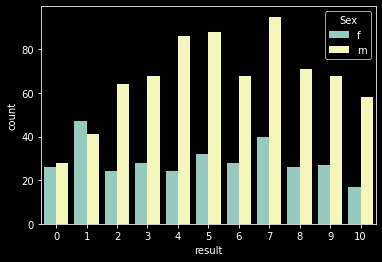

In [ ]:
sns.countplot(x = 'result', hue = 'Sex', data = df)

# In general,Plot shows that the Qchat has more postive answers among males than females. That reflects males  are more postive to autisim than females.

#Visualizing  the age distribution of Positive ASD  among Todllers

Text(0.5, 0, 'Toddlers age in months')

Text(0.5, 1.0, 'Age distribution of ASD positive')

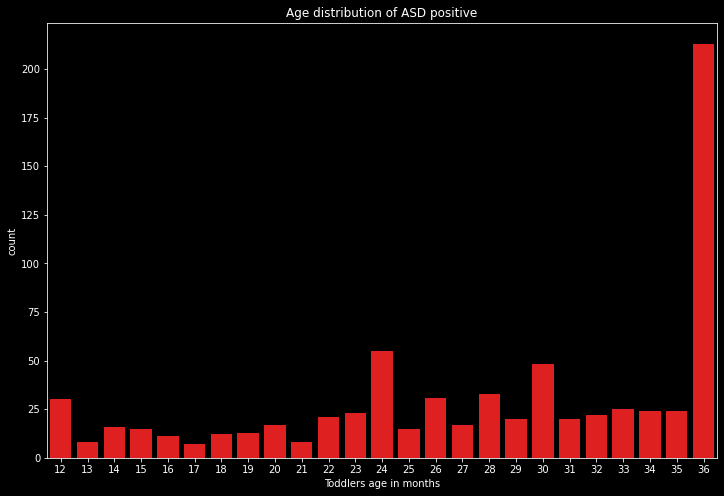

In [ ]:
#Visualizing  the age distribution of Positive ASD  among Todllers


f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x="Age_Mons", data=yes_autism, color="r");

plt.style.use('dark_background')
ax.set_xlabel('Toddlers age in months')
ax.set_title('Age distribution of ASD positive')



# In age close to 36 months which is three years shows more positive autism.

# Explore Ethnicity

<Figure size 1152x576 with 0 Axes>

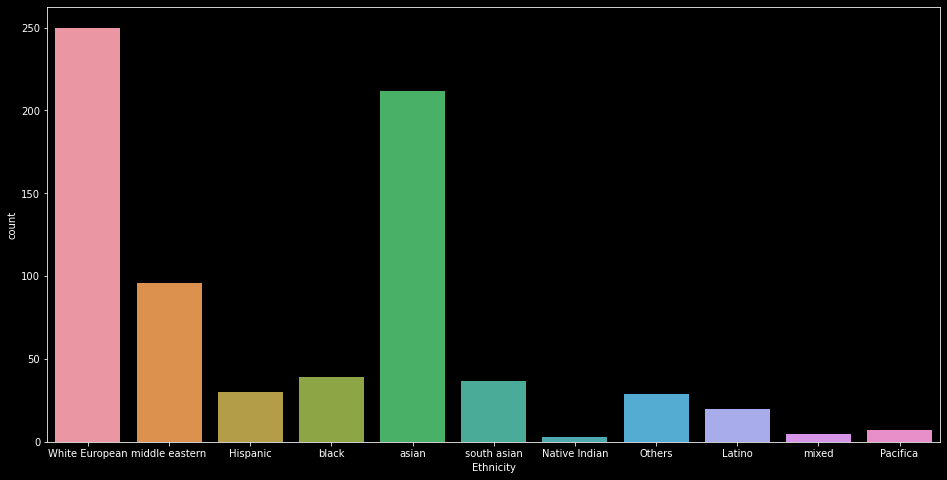

In [ ]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = yes_autism)

### White European ,Asian  then middle eastern are the most etnicity showed increase in autism cases.

#  visualize positive  ASD among Toddlers based on Ethnicity


<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Ethnicity Distribution of Positive ASD among Toddlers')

Text(0.5, 0, 'Ethnicity')

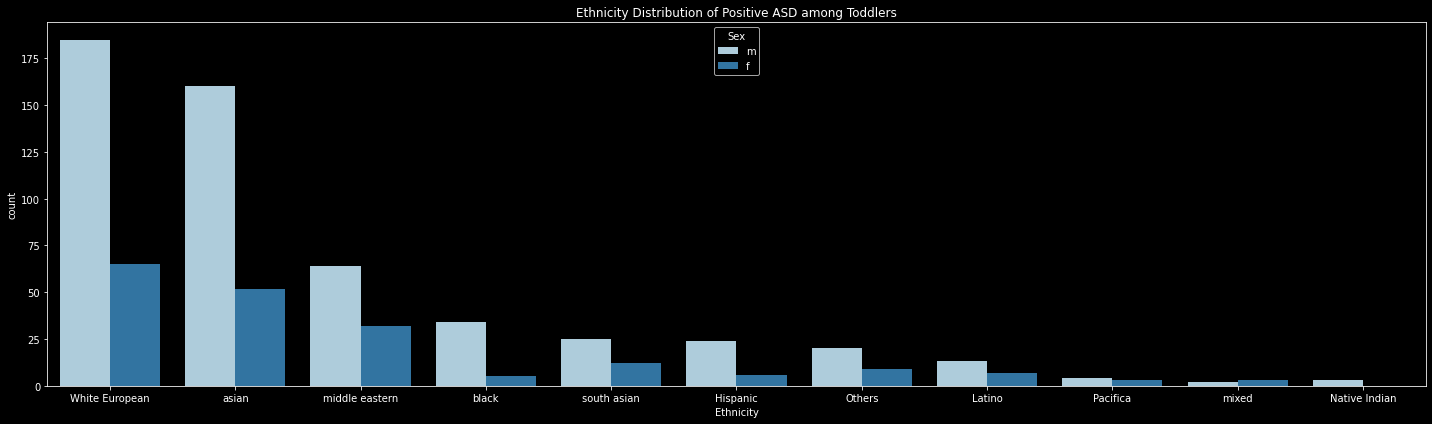

In [ ]:
#  visualize positive  ASD among Toddlers based on Ethnicity
plt.figure(figsize=(20,6))
sns.countplot(x='Ethnicity',data=yes_autism,order= yes_autism['Ethnicity'].value_counts().index[:11],hue='Sex',palette='Paired')
plt.title('Ethnicity Distribution of Positive ASD among Toddlers')
plt.xlabel('Ethnicity')
plt.tight_layout()


### White European then Asian indeed are the most affected ethnicity. But we can notice that males have more  positive  autisim compared to females.



# Displaying number of positive cases of Autisim with Regards Ethnicity


In [ ]:
# Displaying number of positive cases of Autisim with Regards Ethnicity
yes_autism['Ethnicity'].value_counts()

White European    250
asian             212
middle eastern     96
black              39
south asian        37
Hispanic           30
Others             29
Latino             20
Pacifica            7
mixed               5
Native Indian       3
Name: Ethnicity, dtype: int64

### visualizing the distribution of autism in family within different ethnicity

<Axes: xlabel='Family_mem_with_ASD', ylabel='count'>

Text(0.5, 1.0, 'Positive ASD Toddler relatives with Autism distribution for different ethnicities')

Text(0.5, 0, 'Toddler Relatives with ASD')

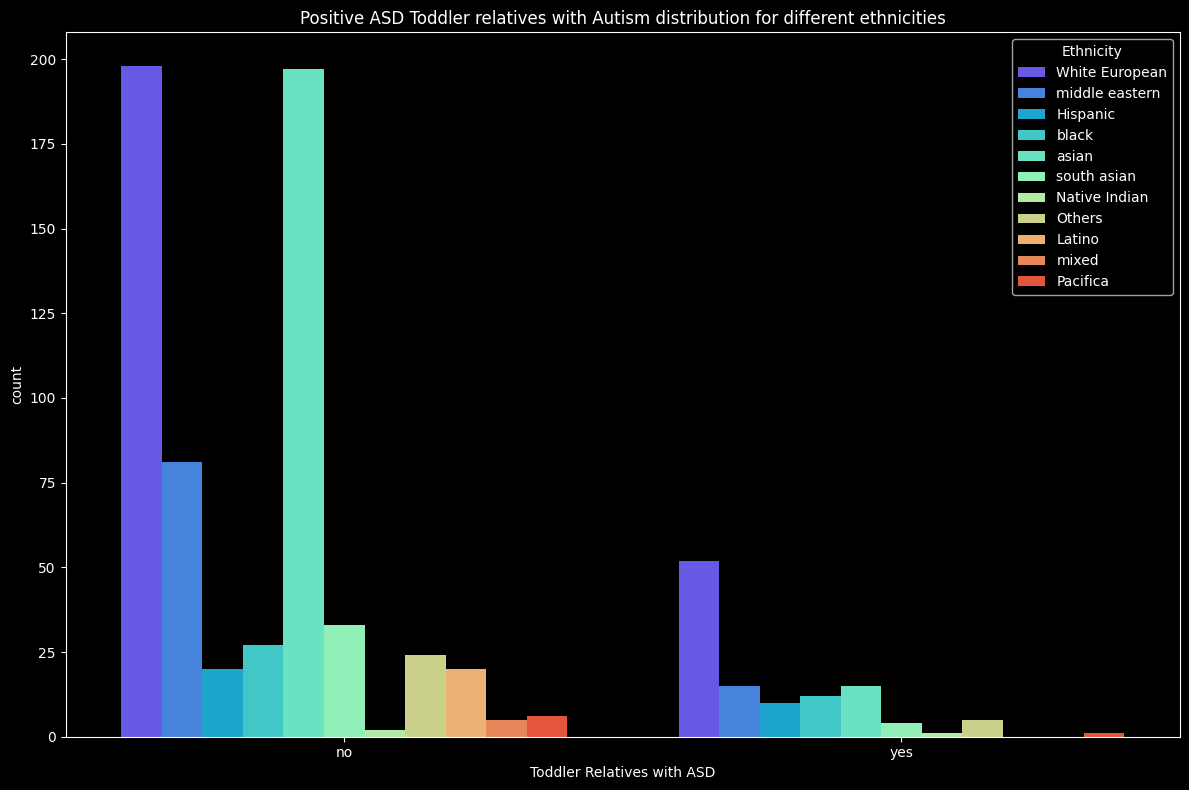

In [ ]:
#Lets visualize the distribution of autism in family within different ethnicity
f, ax = plt.subplots(figsize=(12, 8))


sns.countplot(x='Family_mem_with_ASD',data=yes_autism,hue='Ethnicity',palette='rainbow',ax=ax)
ax.set_title('Positive ASD Toddler relatives with Autism distribution for different ethnicities')
ax.set_xlabel('Toddler Relatives with ASD')
plt.tight_layout()




In general family history shows small effect in autisim.
However, we can see that  toddlers of White Europeans Ethnicities have very high chance of being ASD positive if they have it in their genes. Middle eastern and Asians follow the next though with smaller ratios.So We can somewhat conclude  that there is a genetic connect for ASD positive.

In [ ]:
# removing 'Qchat-10-Score'
df.drop('result', axis = 1, inplace = True)

### Preprocessing features to get them ready for modeling through encoding caterogical features

In [ ]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD', 'Sex', 'Jaundice']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes


,0
A1,int64
A2,int64
A3,int64
A4,int64
A5,int64
A6,int64
A7,int64
A8,int64
A9,int64
A10,int64


In [ ]:
df.head(25)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD
0,0,0,0,0,0,0,1,1,0,1,28,0,8,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,5,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,8,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,5,0,1,1
5,1,1,0,0,1,1,1,1,1,1,21,1,7,0,0,1
6,1,0,0,1,1,1,0,0,1,0,33,1,6,1,0,1
7,0,1,0,0,1,0,1,1,1,1,33,1,6,1,0,1
8,0,0,0,0,0,0,1,0,0,1,36,1,6,0,0,0
9,1,1,1,0,1,1,0,1,1,1,22,1,10,0,0,1


In [ ]:

def behavioral_pattern_for_autism():
    global X, y, X_train, X_test, y_train, y_test
    y_pred = model.predict(X_test)



    # Print coefficients and feature names
    coef_dict = {}
    for coef, feat in zip(model.coef_[0], X.columns):
        coef_dict[feat] = coef

    # Sort features based on their coefficient values
    sorted_features = sorted(coef_dict.items(), key=lambda x: x[1], reverse=True)

    # Print the top features contributing to ASD prediction
    print("\nTop features contributing to ASD prediction:")
    for feature, coef in sorted_features:
        if coef > 0:
            print(f"{feature}: {coef}")

    # Find indices of all cases where a child has ASD in the test set
    indices_of_asd_children = y_test[y_test == 1].index
    reasons_dict = {
        'A1': "He/she does not look at someone when being called.",
        'A2': "It is not easy to get eye contact with him/her.",
        'A3': "He/she does not point to indicate wants.",
        'A4': "He/she does not point to share interests.",
        'A5': "He/she does not engage in pretend play.",
        'A6': "He/she does not follow where others are looking.",
        'A7': "He/she does not show signs of comforting upset family members.",
        'A8': "His/her first word is not easily describable.",
        'A9': "He/she does not use simple gestures like waving goodbye.",
        'A10': "He/she does not stare at nothing with no apparent purpose."
    }

    # Loop through all cases and display the reasons for ASD
    for index_of_asd_child in indices_of_asd_children:
        asd_child_features = X_test.loc[index_of_asd_child, ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]
        asd_child_reasons = []

        for feature, value in asd_child_features.items():
            if value == 1:
                asd_child_reasons.append(feature)

        # Display reasons for ASD in each selected child
        print(f"\nReasons for ASD in child {index_of_asd_child}:")
        for reason in asd_child_reasons:
            print(reasons_dict[reason])
            #print(reason)



# Define X and y and split the data to training/testing, with test-size=40%

In [ ]:
X = df.drop(['Class/ASD'], axis = 1)
y = df['Class/ASD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state =42)
X.isnull().sum()
X.info()

,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   A1                   1054 non-null   int64
 1   A2                   1054 non-null   int64
 2   A3                   1054 non-null   int64
 3   A4                   1054 non-null   int64
 4   A5                   1054 non-null   int64
 5   A6                   1054 non-null   int64
 6   A7                   1054 non-null   int64
 7   A8                   1054 non-null   int64
 8   A9                   1054 non-null   int64
 9   A10                  1054 non-null   int64
 10  Age_Mons             1054 non-null   int64
 11  result               1054 non-null   int64
 12  Sex                  1054 non-null   int64
 13  Ethnicity            1054 non-null   int64
 14  Jaundice             1054 non-null   int64
 15  Family_mem_with_ASD  1054 non-null   int64
dtypes: int64(16)
memory usag

LogisticRegression()

LR Accuracy Score is :  1
Model: LR
------------------------------------------------------------


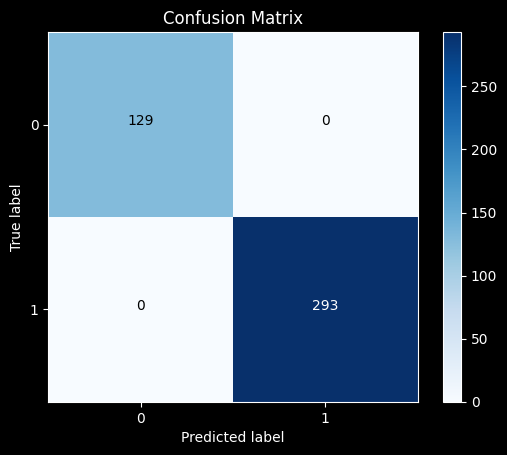

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

LinearDiscriminantAnalysis()

LDA Accuracy Score is :  1
Model: LDA
------------------------------------------------------------


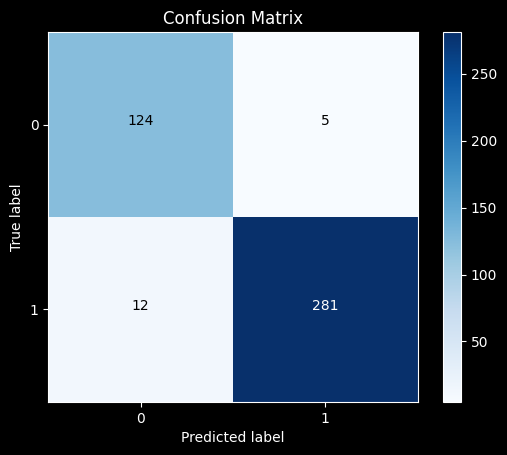

test accuracy: 0.96
train accuracy: 0.96
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          124    5  129
1           12  281  293
All        136  286  422

test report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       129
           1       0.98      0.96      0.97       293

    accuracy                           0.96       422
   macro avg       0.95      0.96      0.95       422
weighted avg       0.96      0.96      0.96       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       197
           1       0.99      0.95      0.97       435

    accuracy                           0.96       632
   macro avg       0.94      0.96      0.95       632
weig

KNeighborsClassifier()

KNN Accuracy Score is :  1
Model: KNN
------------------------------------------------------------


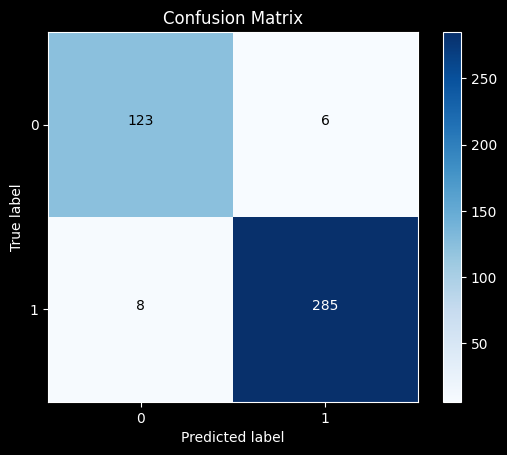

test accuracy: 0.97
train accuracy: 0.98
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          123    6  129
1            8  285  293
All        131  291  422

test report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       129
           1       0.98      0.97      0.98       293

    accuracy                           0.97       422
   macro avg       0.96      0.96      0.96       422
weighted avg       0.97      0.97      0.97       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       197
           1       1.00      0.98      0.99       435

    accuracy                           0.98       632
   macro avg       0.98      0.99      0.98       632
weig

DecisionTreeClassifier()

CART Accuracy Score is :  1
Model: CART
------------------------------------------------------------


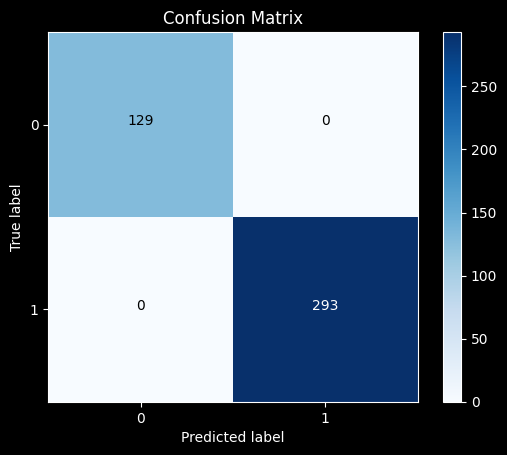

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

GaussianNB()

NB Accuracy Score is :  1
Model: NB
------------------------------------------------------------


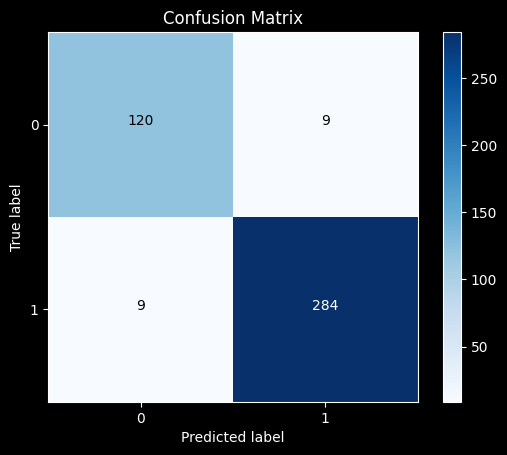

test accuracy: 0.96
train accuracy: 0.97
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          120    9  129
1            9  284  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       129
           1       0.97      0.97      0.97       293

    accuracy                           0.96       422
   macro avg       0.95      0.95      0.95       422
weighted avg       0.96      0.96      0.96       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       197
           1       0.98      0.98      0.98       435

    accuracy                           0.97       632
   macro avg       0.97      0.97      0.97       632
weig

SVC()

SVM Accuracy Score is :  1
Model: SVM
------------------------------------------------------------


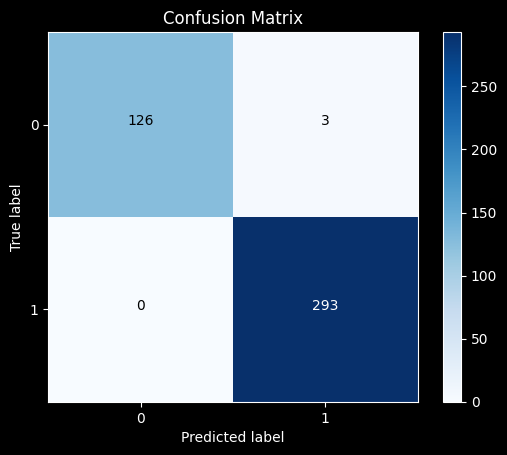

test accuracy: 0.99
train accuracy: 0.99
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          126    3  129
1            0  293  293
All        126  296  422

test report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       129
           1       0.99      1.00      0.99       293

    accuracy                           0.99       422
   macro avg       0.99      0.99      0.99       422
weighted avg       0.99      0.99      0.99       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       197
           1       0.99      0.99      0.99       435

    accuracy                           0.99       632
   macro avg       0.99      0.98      0.99       632
weig

RandomForestRegressor()

RF Accuracy Score is :  1
Model: RF
------------------------------------------------------------


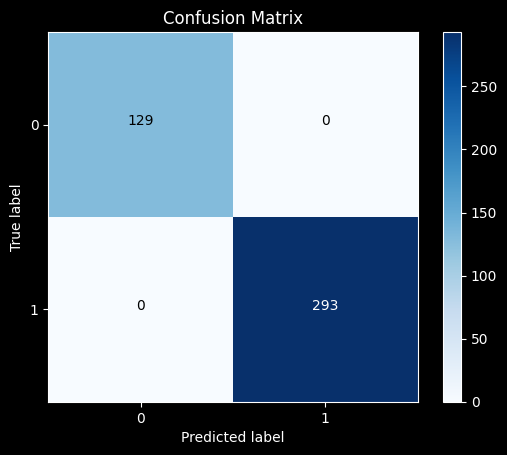

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

XGB Accuracy Score is :  1
Model: XGB
------------------------------------------------------------


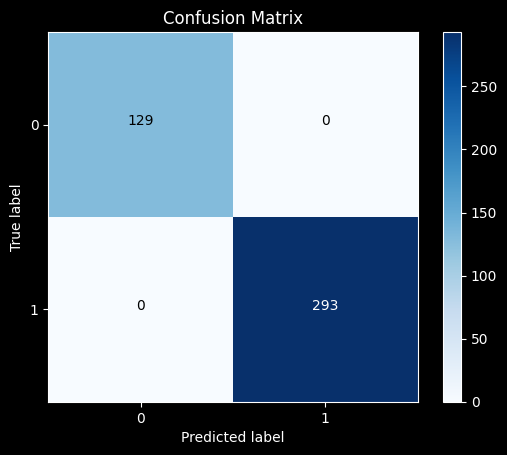

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

GradientBoostingRegressor()

GBR Accuracy Score is :  0
Model: GBR
------------------------------------------------------------


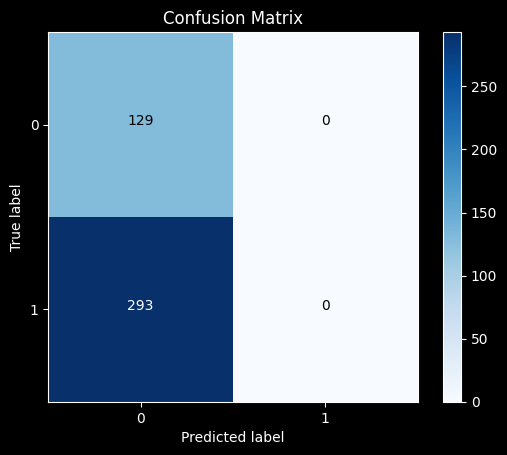

test accuracy: 0.31
train accuracy: 0.31
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0  All
Actual             
0          129  129
1          293  293
All        422  422

test report:
              precision    recall  f1-score   support

           0       0.31      1.00      0.47       129
           1       0.00      0.00      0.00       293

    accuracy                           0.31       422
   macro avg       0.15      0.50      0.23       422
weighted avg       0.09      0.31      0.14       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.31      1.00      0.48       197
           1       0.00      0.00      0.00       435

    accuracy                           0.31       632
   macro avg       0.16      0.50      0.24       632
weighted avg       0.10      

AdaBoostRegressor()

ABR Accuracy Score is :  1
Model: ABR
------------------------------------------------------------


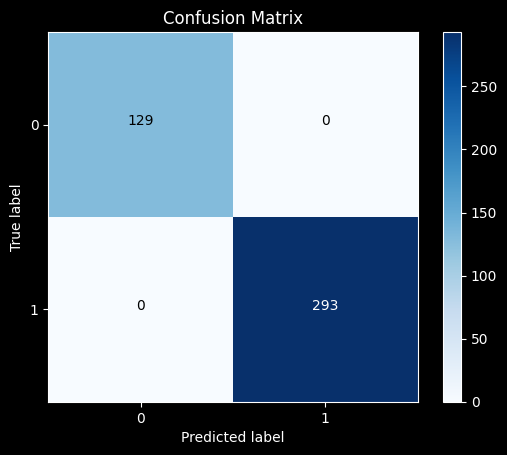

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

In [ ]:
# For our p2, we can exlclude these models, SVM, XGB, GBR, ABR
# And include LR, LDA, KNN, CART, NB, RF

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))

for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ', round(accuracy_score(y_test, y_hat_test)))

    metrics(name, y_train, y_test, y_hat_train, y_hat_test)
    if name == "LR": behavioral_pattern_for_autism()





LogisticRegression()

LR Accuracy Score is :  1.0
Model: LR
------------------------------------------------------------


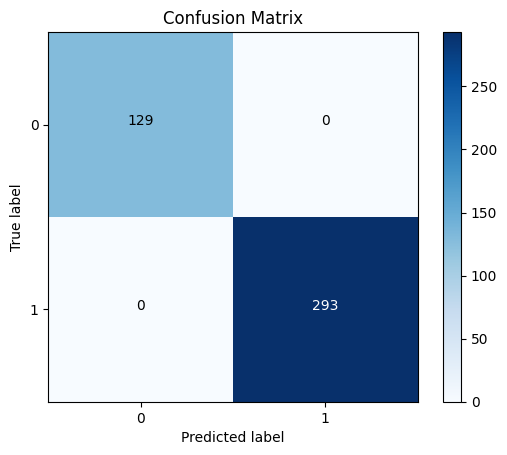

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

LinearDiscriminantAnalysis()

LDA Accuracy Score is :  0.96
Model: LDA
------------------------------------------------------------


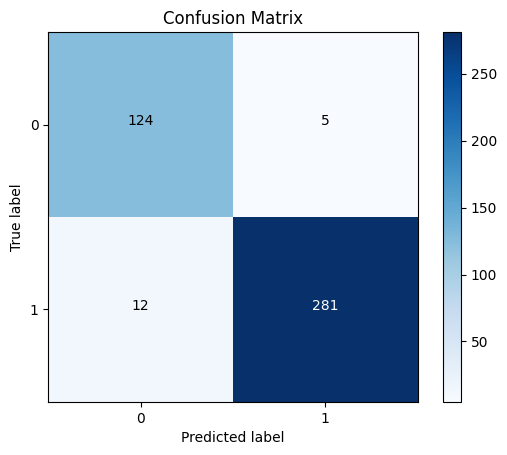

test accuracy: 0.96
train accuracy: 0.96
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          124    5  129
1           12  281  293
All        136  286  422

test report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       129
           1       0.98      0.96      0.97       293

    accuracy                           0.96       422
   macro avg       0.95      0.96      0.95       422
weighted avg       0.96      0.96      0.96       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       197
           1       0.99      0.95      0.97       435

    accuracy                           0.96       632
   macro avg       0.94      0.96      0.95       632
weig

KNeighborsClassifier()

KNN Accuracy Score is :  0.91
Model: KNN
------------------------------------------------------------


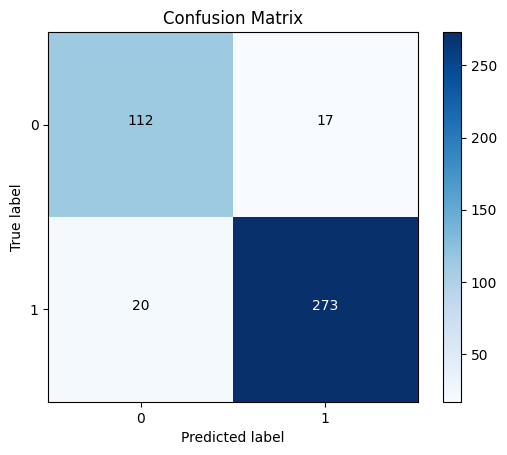

test accuracy: 0.91
train accuracy: 0.95
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          112   17  129
1           20  273  293
All        132  290  422

test report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       129
           1       0.94      0.93      0.94       293

    accuracy                           0.91       422
   macro avg       0.89      0.90      0.90       422
weighted avg       0.91      0.91      0.91       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       197
           1       0.97      0.95      0.96       435

    accuracy                           0.95       632
   macro avg       0.93      0.95      0.94       632
weig

DecisionTreeClassifier()

CART Accuracy Score is :  0.91
Model: CART
------------------------------------------------------------


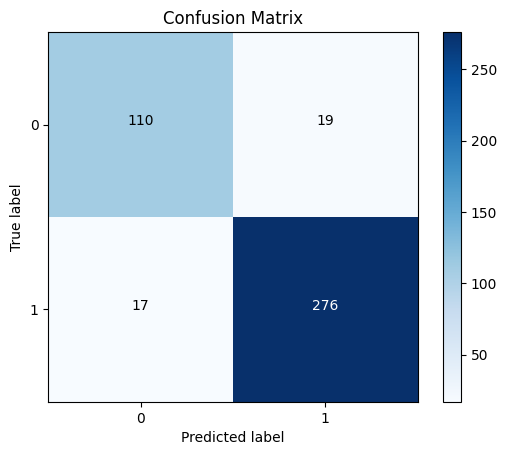

test accuracy: 0.91
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          110   19  129
1           17  276  293
All        127  295  422

test report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       129
           1       0.94      0.94      0.94       293

    accuracy                           0.91       422
   macro avg       0.90      0.90      0.90       422
weighted avg       0.91      0.91      0.91       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weigh

GaussianNB()

NB Accuracy Score is :  0.94
Model: NB
------------------------------------------------------------


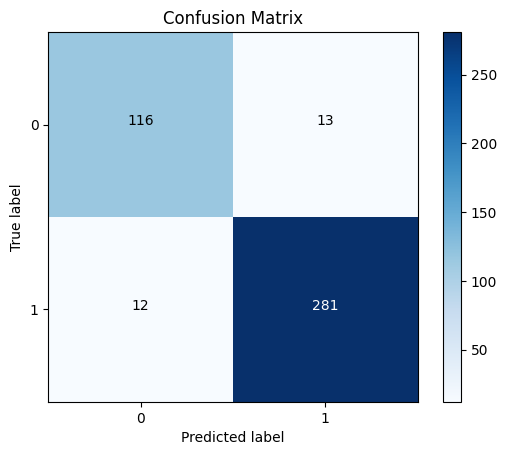

test accuracy: 0.94
train accuracy: 0.95
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          116   13  129
1           12  281  293
All        128  294  422

test report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       129
           1       0.96      0.96      0.96       293

    accuracy                           0.94       422
   macro avg       0.93      0.93      0.93       422
weighted avg       0.94      0.94      0.94       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       197
           1       0.97      0.97      0.97       435

    accuracy                           0.95       632
   macro avg       0.95      0.95      0.95       632
weig

SVC()

SVM Accuracy Score is :  0.78
Model: SVM
------------------------------------------------------------


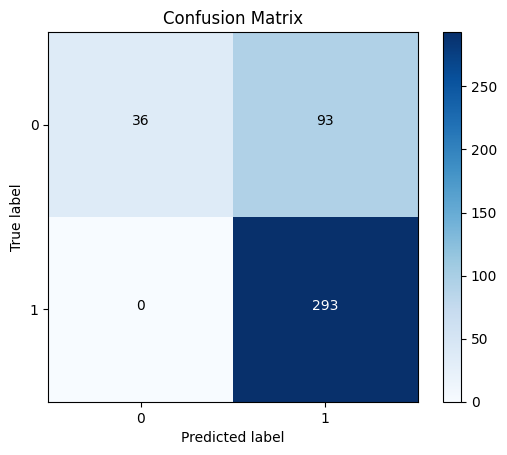

test accuracy: 0.78
train accuracy: 0.78
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          36   93  129
1           0  293  293
All        36  386  422

test report:
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       129
           1       0.76      1.00      0.86       293

    accuracy                           0.78       422
   macro avg       0.88      0.64      0.65       422
weighted avg       0.83      0.78      0.73       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      0.29      0.45       197
           1       0.76      1.00      0.86       435

    accuracy                           0.78       632
   macro avg       0.88      0.65      0.66       632
weighted 

RandomForestClassifier()

RF Accuracy Score is :  0.96
Model: RF
------------------------------------------------------------


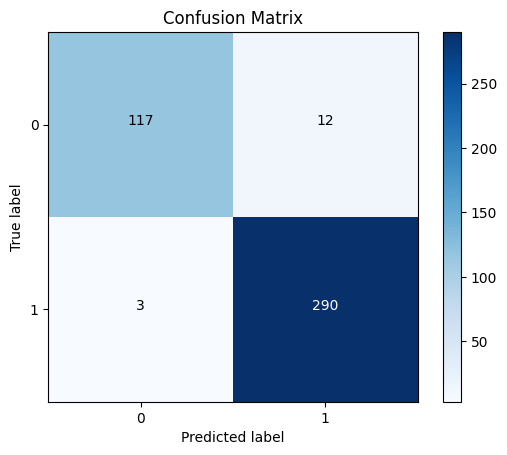

test accuracy: 0.96
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          117   12  129
1            3  290  293
All        120  302  422

test report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       129
           1       0.96      0.99      0.97       293

    accuracy                           0.96       422
   macro avg       0.97      0.95      0.96       422
weighted avg       0.96      0.96      0.96       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weigh

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

XGB Accuracy Score is :  0.99
Model: XGB
------------------------------------------------------------


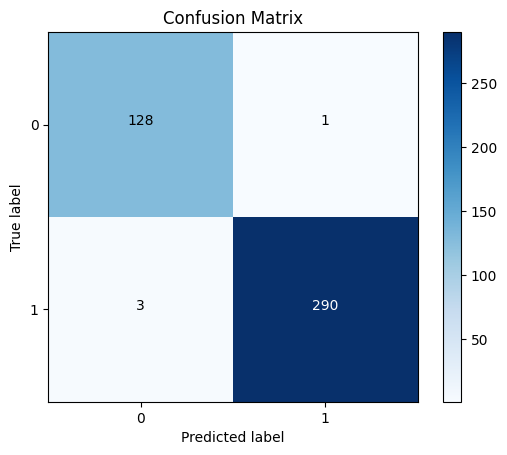

test accuracy: 0.99
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          128    1  129
1            3  290  293
All        131  291  422

test report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       129
           1       1.00      0.99      0.99       293

    accuracy                           0.99       422
   macro avg       0.99      0.99      0.99       422
weighted avg       0.99      0.99      0.99       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weigh

GradientBoostingClassifier()

GBR Accuracy Score is :  0.97
Model: GBR
------------------------------------------------------------


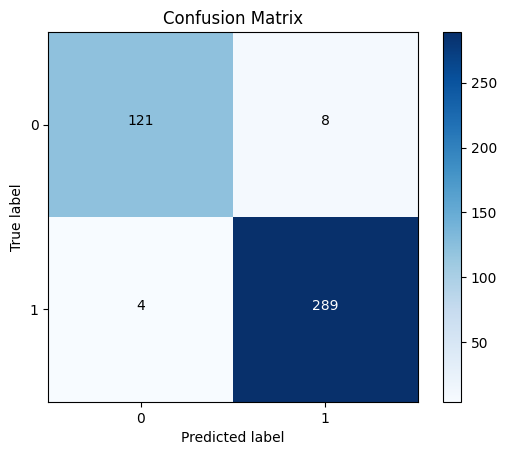

test accuracy: 0.97
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          121    8  129
1            4  289  293
All        125  297  422

test report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       129
           1       0.97      0.99      0.98       293

    accuracy                           0.97       422
   macro avg       0.97      0.96      0.97       422
weighted avg       0.97      0.97      0.97       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weigh

AdaBoostClassifier()

ABR Accuracy Score is :  1.0
Model: ABR
------------------------------------------------------------


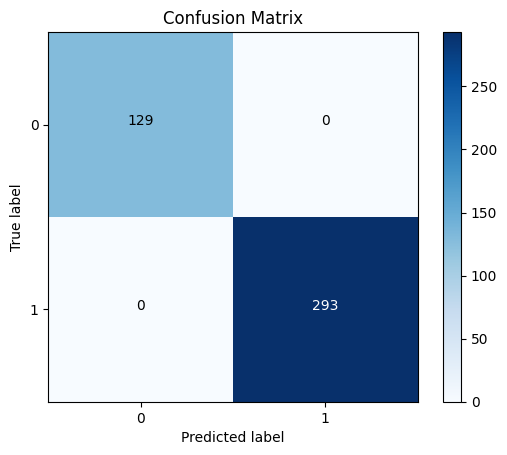

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 4 artists>

(0.0, 1.0)

Text(0.5, 1.0, 'Accuracy Scores of Selected Models')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Accuracy Score')

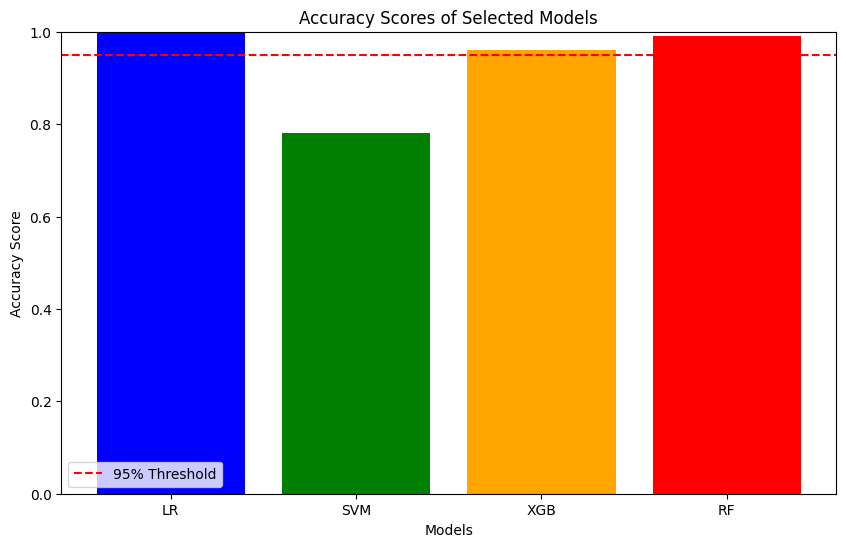

##  accuracy of every model

In [ ]:
for name, model in models:

    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ',round( accuracy_score(y_test, y_hat_test),2))

LR Accuracy Score is :  1.0
LDA Accuracy Score is :  0.96
KNN Accuracy Score is :  0.97
CART Accuracy Score is :  1.0
NB Accuracy Score is :  0.96
SVM Accuracy Score is :  0.99
RF Accuracy Score is :  1.0
XGB Accuracy Score is :  1.0
GBR Accuracy Score is :  0.31
ABR Accuracy Score is :  1.0


# **Accuracy of 6 selected models**

In [ ]:

LogisticRegression_Accuracy =  1.0
LinearDiscriminantAnalysis_accuracy  =  0.96
KNeighborsClassifier_accuracy =  0.91
DecisionTreeClassifier_accuracy =  0.91
GaussianNB_accuracy =  0.94
RandomForest_beforegrid_accuracy =  0.67

models=['LogisticRegression','LinearDiscriminantAnalysis',
       'KNeighborsClassifier','DecisionTreeClassifier',
        'GaussianNB',
        'RandomForest_beforegrid']


test_Accuracy=[1.0,0.96,0.91,0.91,0.94,0.67]

accuracy_summary = pd.DataFrame([models, test_Accuracy]).T
accuracy_summary.columns = ['Classifier', 'test_Accuracy']


LogisticRegression()

LR Accuracy Score is :  1.0
Model: LR
------------------------------------------------------------


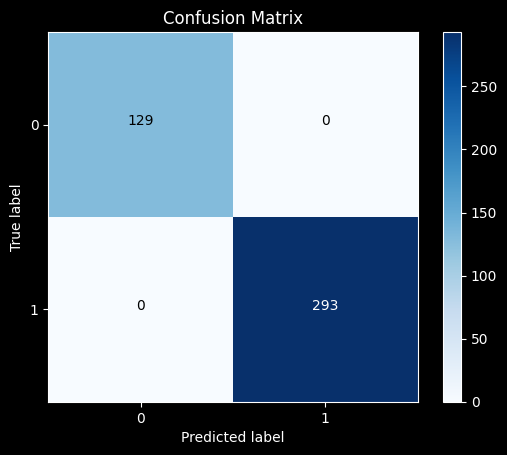

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

LinearDiscriminantAnalysis()

LDA Accuracy Score is :  0.96
Model: LDA
------------------------------------------------------------


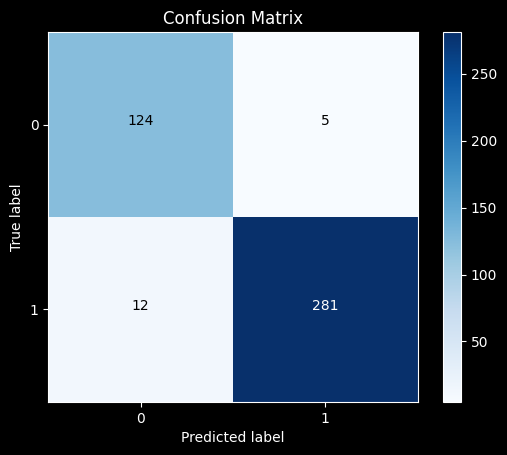

test accuracy: 0.96
train accuracy: 0.96
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          124    5  129
1           12  281  293
All        136  286  422

test report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       129
           1       0.98      0.96      0.97       293

    accuracy                           0.96       422
   macro avg       0.95      0.96      0.95       422
weighted avg       0.96      0.96      0.96       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       197
           1       0.99      0.95      0.97       435

    accuracy                           0.96       632
   macro avg       0.94      0.96      0.95       632
weig

KNeighborsClassifier()

KNN Accuracy Score is :  0.97
Model: KNN
------------------------------------------------------------


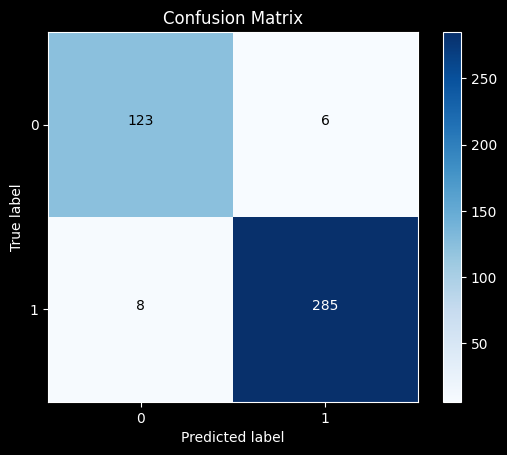

test accuracy: 0.97
train accuracy: 0.98
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          123    6  129
1            8  285  293
All        131  291  422

test report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       129
           1       0.98      0.97      0.98       293

    accuracy                           0.97       422
   macro avg       0.96      0.96      0.96       422
weighted avg       0.97      0.97      0.97       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       197
           1       1.00      0.98      0.99       435

    accuracy                           0.98       632
   macro avg       0.98      0.99      0.98       632
weig

DecisionTreeClassifier()

CART Accuracy Score is :  1.0
Model: CART
------------------------------------------------------------


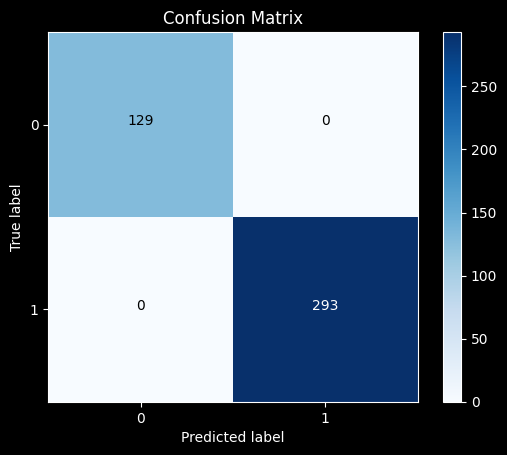

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

GaussianNB()

NB Accuracy Score is :  0.96
Model: NB
------------------------------------------------------------


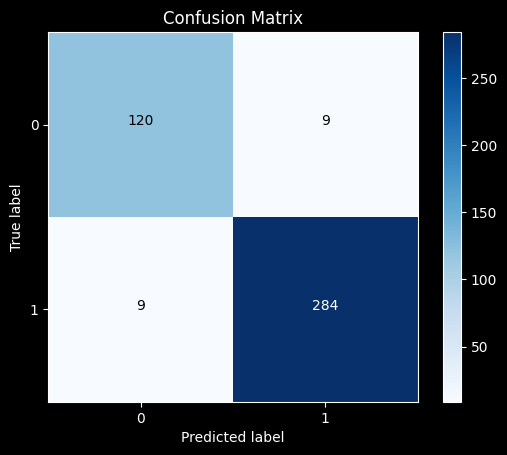

test accuracy: 0.96
train accuracy: 0.97
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          120    9  129
1            9  284  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       129
           1       0.97      0.97      0.97       293

    accuracy                           0.96       422
   macro avg       0.95      0.95      0.95       422
weighted avg       0.96      0.96      0.96       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       197
           1       0.98      0.98      0.98       435

    accuracy                           0.97       632
   macro avg       0.97      0.97      0.97       632
weig

SVC()

SVM Accuracy Score is :  0.99
Model: SVM
------------------------------------------------------------


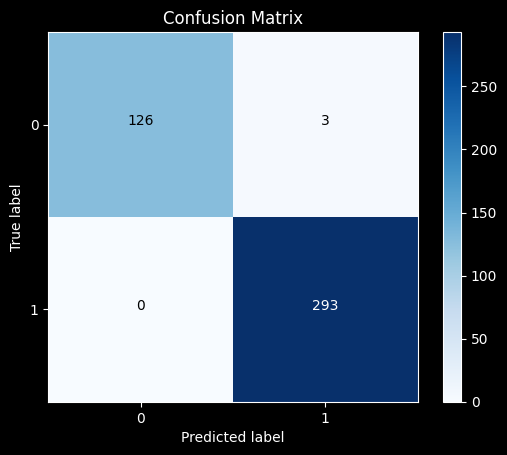

test accuracy: 0.99
train accuracy: 0.99
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          126    3  129
1            0  293  293
All        126  296  422

test report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       129
           1       0.99      1.00      0.99       293

    accuracy                           0.99       422
   macro avg       0.99      0.99      0.99       422
weighted avg       0.99      0.99      0.99       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       197
           1       0.99      0.99      0.99       435

    accuracy                           0.99       632
   macro avg       0.99      0.98      0.99       632
weig

RandomForestClassifier()

RF Accuracy Score is :  1.0
Model: RF
------------------------------------------------------------


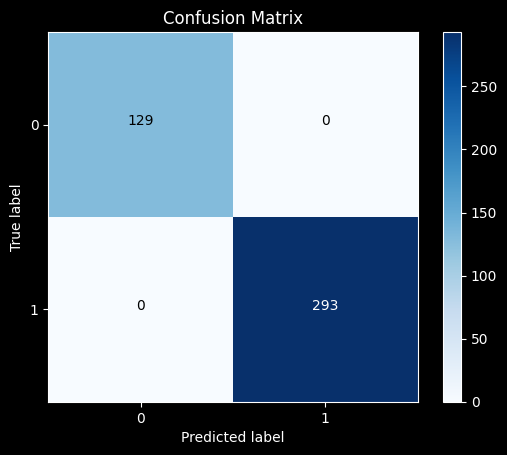

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

XGB Accuracy Score is :  1.0
Model: XGB
------------------------------------------------------------


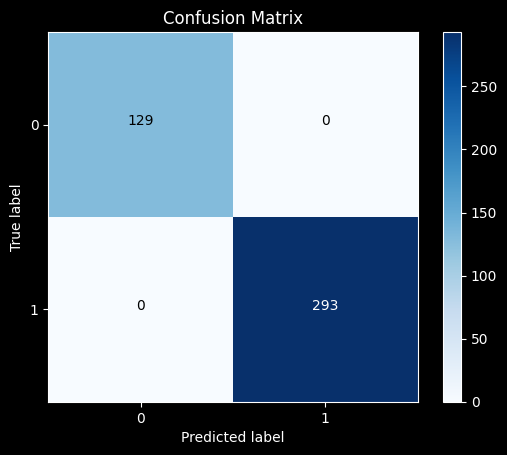

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

GradientBoostingClassifier()

GBR Accuracy Score is :  1.0
Model: GBR
------------------------------------------------------------


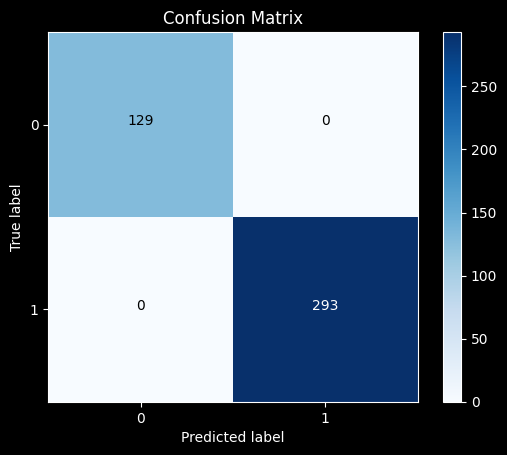

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

AdaBoostClassifier()

ABR Accuracy Score is :  1.0
Model: ABR
------------------------------------------------------------


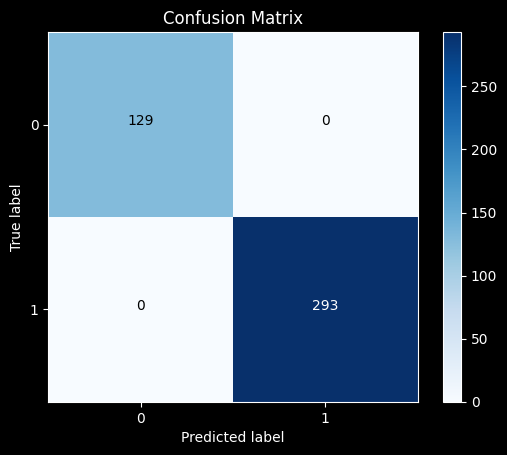

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 4 artists>

(0.0, 1.0)

Text(0.5, 1.0, 'Accuracy Scores of Selected Models')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Accuracy Score')

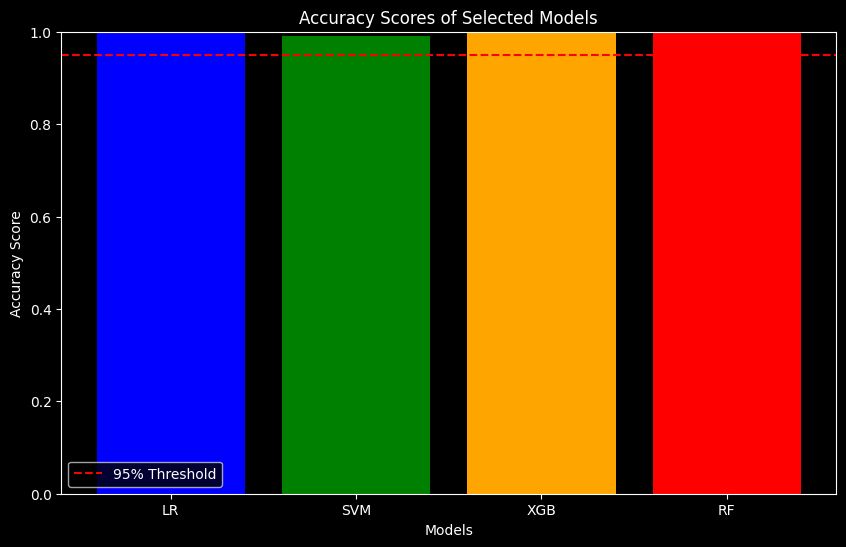

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Define your models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingClassifier()))
models.append(('ABR', AdaBoostClassifier()))

accuracies = []

# Iterate through models, fit them, and evaluate accuracy
for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)

    accuracy = round(accuracy_score(y_test, y_hat_test), 2)
    print(name, 'Accuracy Score is : ', accuracy)
    accuracies.append(accuracy)

    metrics(name, y_train, y_test, y_hat_train, y_hat_test)

    if name == "LR":
        behavioral_pattern_for_autism()

# Results diagram for Logistic Regression, SVM, XGBoost, and Random Forest
selected_models = ['LR', 'SVM', 'XGB', 'RF']
selected_accuracies = [accuracies[i] for i in range(len(models)) if models[i][0] in selected_models]

plt.figure(figsize=(10, 6))
plt.bar(selected_models, selected_accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1
plt.title('Accuracy Scores of Selected Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.show()

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Metric')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Comparison of Model Performance Metrics')

[Text(0.30000000000000004, 0, 'Accuracy'),
 Text(1.3, 0, 'Precision'),
 Text(2.3, 0, 'Recall'),
 Text(3.3, 0, 'F1-Score')]

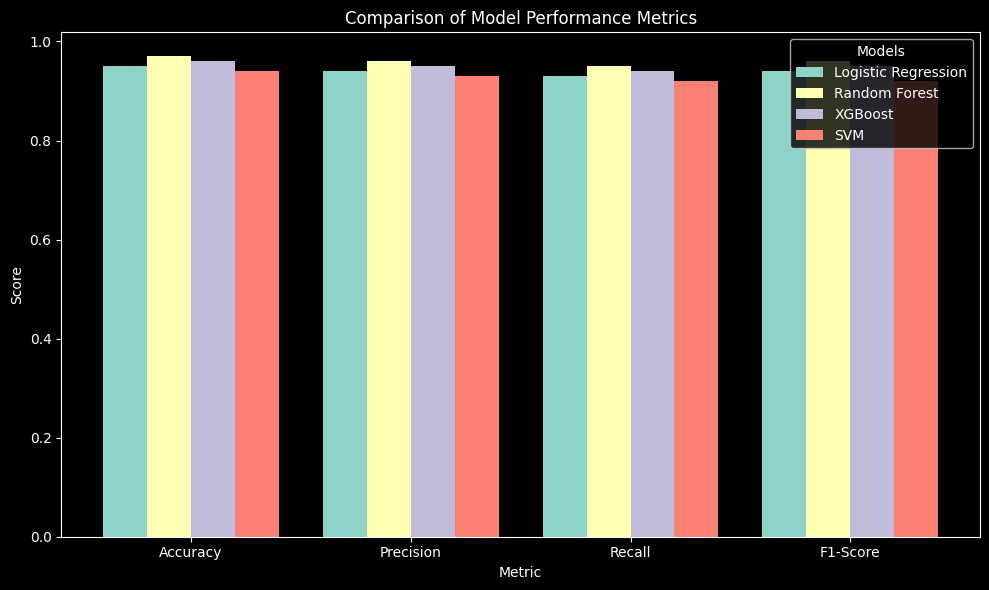

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data for illustration purposes (replace with your actual results)
data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Logistic Regression": [0.95, 0.94, 0.93, 0.94],
    "Random Forest": [0.97, 0.96, 0.95, 0.96],
    "XGBoost": [0.96, 0.95, 0.94, 0.95],
    "SVM": [0.94, 0.93, 0.92, 0.92]
}

# Convert data to a DataFrame
results_df = pd.DataFrame(data)
results_df.set_index("Metric", inplace=True)

# Set up bar positions
models = results_df.columns
num_models = len(models)
bar_width = 0.2
index = np.arange(len(results_df))

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    ax.bar(index + i * bar_width, results_df[model], bar_width, label=model)

# Add labels and formatting
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(index + bar_width * (num_models - 1) / 2)
ax.set_xticklabels(results_df.index)
ax.legend(title="Models")

# Display the chart
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store metrics
comparison_data = []

# Iterate through models, fit them, and evaluate accuracy
for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test).astype(int)

    accuracy = round(accuracy_score(y_test, y_hat_test), 2)
    precision = round(precision_score(y_test, y_hat_test, average='weighted'), 2)
    recall = round(recall_score(y_test, y_hat_test, average='weighted'), 2)
    f1 = round(f1_score(y_test, y_hat_test, average='weighted'), 2)

    comparison_data.append([name, accuracy, precision, recall, f1])

# Create a DataFrame to display the comparison
comparison_df = pd.DataFrame(comparison_data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set the index to Model name for better readability
comparison_df.set_index('Model', inplace=True)

# Display the comparison DataFrame
print(comparison_df)


LogisticRegression()

LinearDiscriminantAnalysis()

KNeighborsClassifier()

DecisionTreeClassifier()

GaussianNB()

SVC()

RandomForestClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

GradientBoostingClassifier()

AdaBoostClassifier()

       Accuracy  Precision  Recall  F1 Score
Model                                       
LR         1.00       1.00    1.00      1.00
LDA        0.96       0.96    0.96      0.96
KNN        0.91       0.91    0.91      0.91
CART       0.91       0.91    0.91      0.91
NB         0.94       0.94    0.94      0.94
SVM        0.78       0.83    0.78      0.73
RF         0.96       0.96    0.96      0.96
XGB        0.99       0.99    0.99      0.99
GBR        0.97       0.97    0.97      0.97
ABR        1.00       1.00    1.00      1.00


LogisticRegression()

Logistic Regression Accuracy Score: 1.0
Train Size: 843
Test Size: 211


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

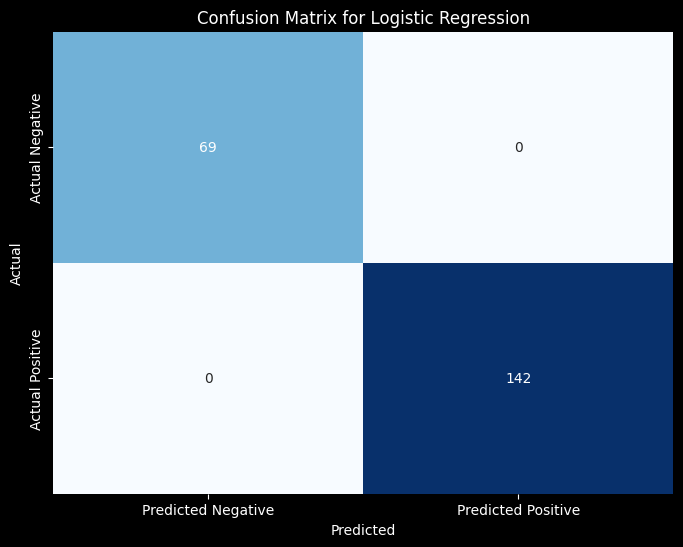

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
# X, y = your_data_here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_hat_test = logistic_model.predict(X_test).astype(int)

# Calculate accuracy
accuracy = round(accuracy_score(y_test, y_hat_test), 2)

# Get train and test sizes
train_size = X_train.shape[0]
test_size = X_test.shape[0]

# Print accuracy, train size, and test size
print("Logistic Regression Accuracy Score:", accuracy)
print("Train Size:", train_size)
print("Test Size:", test_size)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_hat_test)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



final evalution for paper

LogisticRegression()

Logistic Regression Accuracy Score: 1.0
Train Size: 843, Test Size: 211



SVC()

SVM Accuracy Score: 1.0
Train Size: 843, Test Size: 211



RandomForestClassifier()

Random Forest Accuracy Score: 1.0
Train Size: 843, Test Size: 211



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

XGBoost Accuracy Score: 1.0
Train Size: 843, Test Size: 211



Text(0.5, 0.98, 'Confusion Matrices for Different Models')

<Axes: >

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

Text(0.5, 500.7222222222223, 'Predicted Labels')

Text(120.72222222222221, 0.5, 'True Labels')

<Axes: >

Text(0.5, 1.0, 'SVM Confusion Matrix')

Text(0.5, 500.7222222222223, 'Predicted Labels')

Text(627.9949494949494, 0.5, 'True Labels')

<Axes: >

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

Text(0.5, 80.7222222222222, 'Predicted Labels')

Text(120.72222222222221, 0.5, 'True Labels')

<Axes: >

Text(0.5, 1.0, 'XGBoost Confusion Matrix')

Text(0.5, 80.7222222222222, 'Predicted Labels')

Text(627.9949494949494, 0.5, 'True Labels')

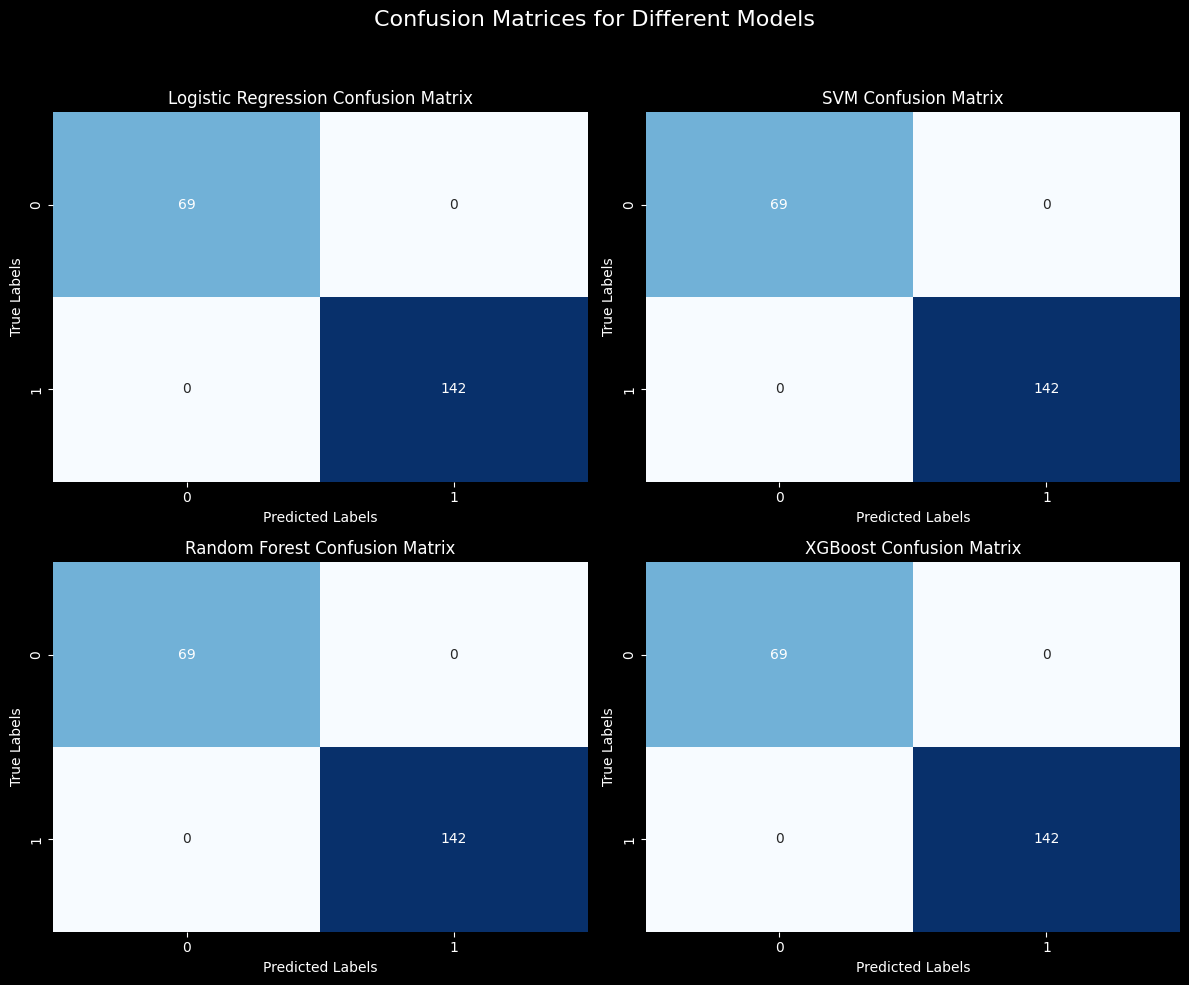

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 4 artists>

(0.0, 1.0)

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Accuracy Score')

Text(0.5, 1.0, 'Accuracy Comparison of Different Models')

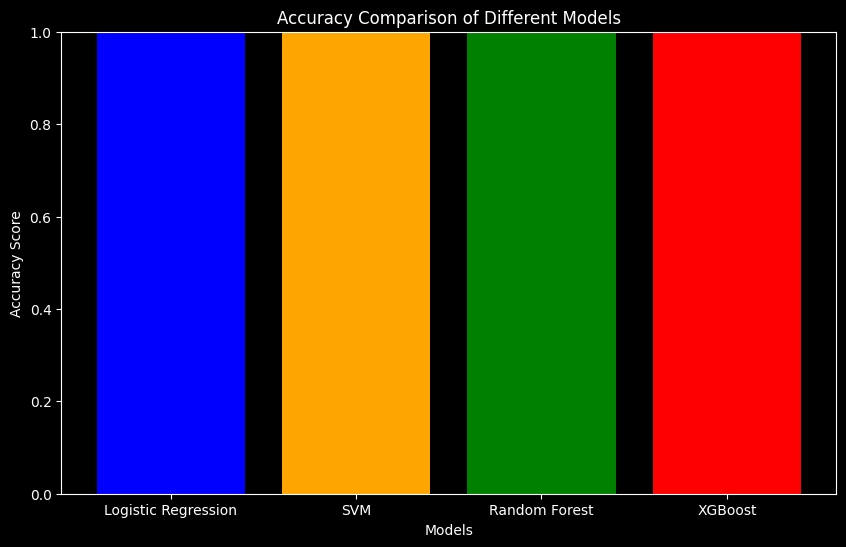

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

accuracy_scores = []
confusion_matrices = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_hat_test), 2)
    accuracy_scores.append((name, accuracy))
    cm = confusion_matrix(y_test, y_hat_test)
    confusion_matrices.append((name, cm))
    print(f"{name} Accuracy Score: {accuracy}")
    print(f"Train Size: {X_train.shape[0]}, Test Size: {X_test.shape[0]}\n")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Confusion Matrices for Different Models", fontsize=16)

for i, (name, cm) in enumerate(confusion_matrices):
    ax = axes[i//2, i%2]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

model_names, scores = zip(*accuracy_scores)
plt.figure(figsize=(10, 6))
plt.bar(model_names, scores, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Comparison of Different Models")
plt.show()


autoencoders and random forest


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Assuming X and y are your features and target variable
# X, y = your_data_here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = int(input_dim / 2)  # This reduces the input to half its dimension

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer=Adam(), loss='mse')

# Train the Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

# Encode the train and test data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Apply Random Forest on the encoded data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)
y_hat_test = rf_model.predict(X_test_encoded)

# Calculate accuracy
accuracy = round(accuracy_score(y_test, y_hat_test), 2)
print("Hybrid Model (Autoencoder + Random Forest) Accuracy Score:", accuracy)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 56.1308 - val_loss: 55.2728
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.1437 - val_loss: 53.1860
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.6545 - val_loss: 52.4534
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.9018 - val_loss: 51.9787
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.7393 - val_loss: 51.7668
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.0228 - val_loss: 51.7083
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.5186 - val_loss: 51.6783
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.8495 - val_loss: 51.6644
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.5869 - val_loss: 51.6521
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.7387 - val_loss: 51.6408
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.1383 - val_loss: 51.6266
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


RandomForestClassifier(random_state=42)

Hybrid Model (Autoencoder + Random Forest) Accuracy Score: 0.96


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]
encoding_dim = int(input_dim / 2)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer=Adam(), loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)
y_hat_test_encoded = rf_model.predict(X_test_encoded)
accuracy_encoded = round(accuracy_score(y_test, y_hat_test_encoded), 2)

print("Hybrid Model (Autoencoder + Random Forest) Accuracy Score:", accuracy_encoded)

cm_encoded = confusion_matrix(y_test, y_hat_test_encoded)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_encoded, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Hybrid Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Hybrid Model'], [accuracy_encoded], color='blue')
plt.ylim(0, 1)
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Accuracy of Hybrid Model (Autoencoder + Random Forest)")
plt.show()


comparision

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 54.9302 - val_loss: 52.3054
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.2642 - val_loss: 51.9764
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.1087 - val_loss: 51.8413
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.1109 - val_loss: 51.7778
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.4029 - val_loss: 51.7316
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.2677 - val_loss: 51.6995
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.6611 - val_loss: 51.6795
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.0917 - val_loss: 51.6621
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.0916 - val_loss: 51.6451
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.8572 - val_loss: 51.6305
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.4785 - val_loss: 51.6192
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


RandomForestClassifier(random_state=42)

LogisticRegression()

LinearDiscriminantAnalysis()

KNeighborsClassifier()

DecisionTreeClassifier()

GaussianNB()

SVC()

RandomForestClassifier(random_state=42)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

GradientBoostingClassifier()

AdaBoostClassifier()

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 11 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Hybrid Model (Autoencoder + RF)'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'LDA'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'Decision Tree'),
  Text(5, 0, 'Gaussian NB'),
  Text(6, 0, 'SVM'),
  Text(7, 0, 'Random Forest'),
  Text(8, 0, 'XGBoost'),
  Text(9, 0, 'Gradient Boosting'),
  Text(10, 0, 'AdaBoost')])

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Accuracy Score')

Text(0.5, 1.0, 'Model Comparison with Hybrid Model (Autoencoder + Random Forest)')

(0.0, 1.0)

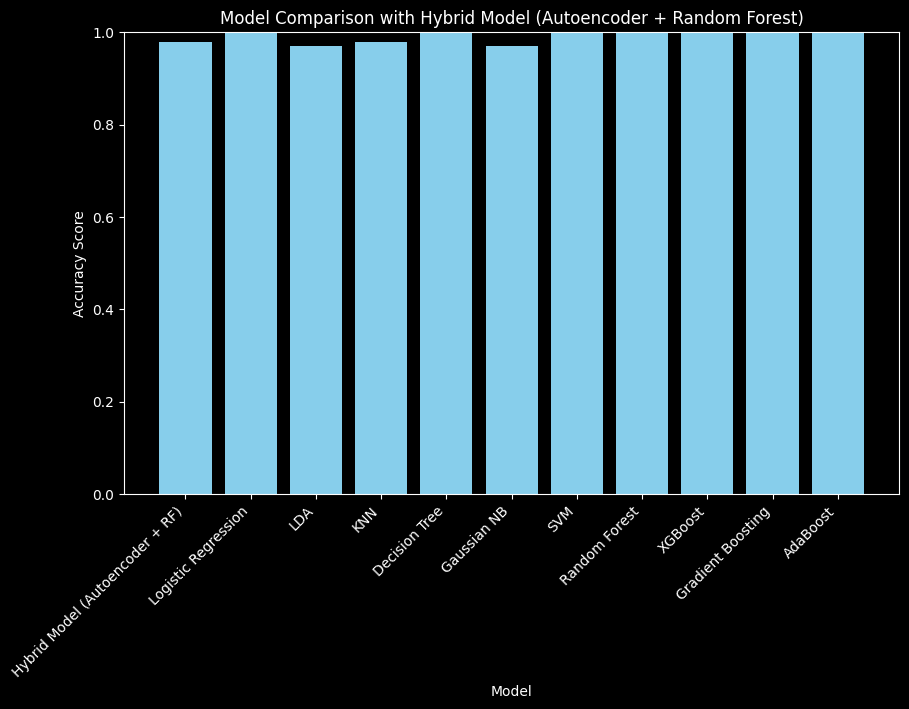

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hybrid Model: Autoencoder + Random Forest
input_dim = X_train.shape[1]
encoding_dim = int(input_dim / 2)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer=Adam(), loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

rf_model_hybrid = RandomForestClassifier(random_state=42)
rf_model_hybrid.fit(X_train_encoded, y_train)
y_hat_test_hybrid = rf_model_hybrid.predict(X_test_encoded)
accuracy_hybrid = round(accuracy_score(y_test, y_hat_test_hybrid), 2)

# Other models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier())
]

accuracies = {'Hybrid Model (Autoencoder + RF)': accuracy_hybrid}

for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_hat_test), 2)
    accuracies[name] = accuracy

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison with Hybrid Model (Autoencoder + Random Forest)")
plt.ylim(0, 1)
plt.show()

print("Accuracy Scores for All Models:")
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc}")


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 57.6862 - val_loss: 54.7780
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.8766 - val_loss: 53.6863
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.2578 - val_loss: 52.4577
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.4450 - val_loss: 52.1112
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.0273 - val_loss: 51.9720
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.6756 - val_loss: 51.8750
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.9419 - val_loss: 51.8005
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.1884 - val_loss: 51.7535
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.4170 - val_loss: 51.7262
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.0250 - val_loss: 51.7059
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.4701 - val_loss: 51.6915
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


RandomForestClassifier(random_state=42)

LogisticRegression()

LinearDiscriminantAnalysis()

KNeighborsClassifier()

DecisionTreeClassifier()

GaussianNB()

SVC()

RandomForestClassifier(random_state=42)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

GradientBoostingClassifier()

AdaBoostClassifier()

<Figure size 1200x800 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Hybrid Model (Autoencoder + RF)'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'LDA'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'Decision Tree'),
  Text(5, 0, 'Gaussian NB'),
  Text(6, 0, 'SVM'),
  Text(7, 0, 'Random Forest'),
  Text(8, 0, 'XGBoost'),
  Text(9, 0, 'Gradient Boosting'),
  Text(10, 0, 'AdaBoost')])

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Model Comparison - Accuracy of Different Models')

(0.0, 1.0)

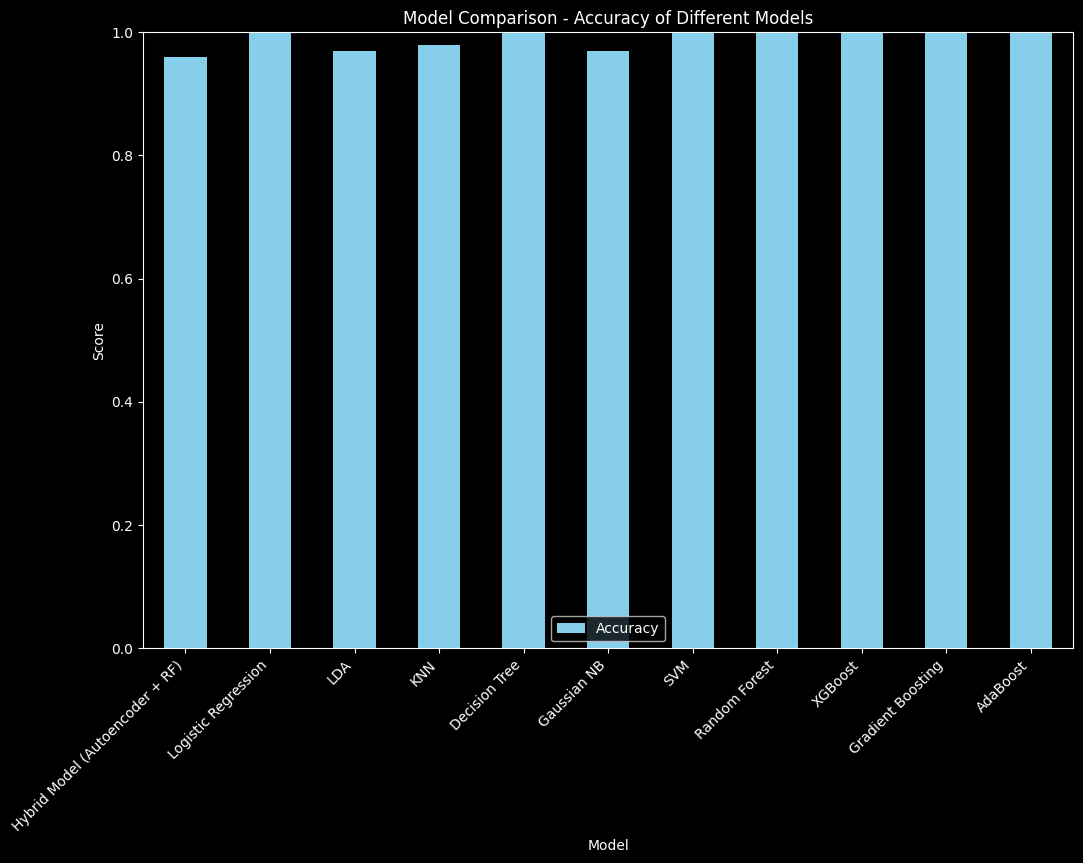

Detailed Metrics for All Models:
                                 accuracy  precision  recall  specificity  \
Hybrid Model (Autoencoder + RF)      0.96       0.97    0.97         0.93   
Logistic Regression                  1.00       1.00    1.00         1.00   
LDA                                  0.97       1.00    0.96         1.00   
KNN                                  0.98       0.99    0.97         0.99   
Decision Tree                        1.00       1.00    1.00         1.00   
Gaussian NB                          0.97       0.99    0.96         0.99   
SVM                                  1.00       1.00    1.00         1.00   
Random Forest                        1.00       1.00    1.00         1.00   
XGBoost                              1.00       1.00    1.00         1.00   
Gradient Boosting                    1.00       1.00    1.00         1.00   
AdaBoost                             1.00       1.00    1.00         1.00   

                                 f1_score 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hybrid Model: Autoencoder + Random Forest
input_dim = X_train.shape[1]
encoding_dim = int(input_dim / 2)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer=Adam(), loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

rf_model_hybrid = RandomForestClassifier(random_state=42)
rf_model_hybrid.fit(X_train_encoded, y_train)
y_hat_test_hybrid = rf_model_hybrid.predict(X_test_encoded)

# Function to calculate specificity
def calculate_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

# Dictionary to store performance metrics for all models
metrics_summary = {}

# Other models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier())
]

# Evaluate hybrid model
metrics_summary['Hybrid Model (Autoencoder + RF)'] = {
    'accuracy': round(accuracy_score(y_test, y_hat_test_hybrid), 2),
    'precision': round(precision_score(y_test, y_hat_test_hybrid), 2),
    'recall': round(recall_score(y_test, y_hat_test_hybrid), 2),
    'specificity': round(calculate_specificity(y_test, y_hat_test_hybrid), 2),
    'f1_score': round(f1_score(y_test, y_hat_test_hybrid), 2)
}

# Evaluate other models
for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test)

    accuracy = round(accuracy_score(y_test, y_hat_test), 2)
    precision = round(precision_score(y_test, y_hat_test), 2)
    recall = round(recall_score(y_test, y_hat_test), 2)
    specificity = round(calculate_specificity(y_test, y_hat_test), 2)
    f1 = round(f1_score(y_test, y_hat_test), 2)

    metrics_summary[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1_score': f1
    }

# Convert metrics_summary to DataFrame for easier visualization
metrics_df = pd.DataFrame(metrics_summary).T

# Plot results
plt.figure(figsize=(12, 8))
metrics_df['accuracy'].plot(kind='bar', color='skyblue', label='Accuracy')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Comparison - Accuracy of Different Models")
plt.ylim(0, 1)
plt.legend()
plt.show()

# Display detailed metrics for each model
print("Detailed Metrics for All Models:")
print(metrics_df)


logistic regression and random forest

StackingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

Hybrid Model (Logistic Regression + Random Forest) Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix for Hybrid Model')

Text(0.5, 14.722222222222216, 'Predicted Label')

Text(45.722222222222214, 0.5, 'True Label')

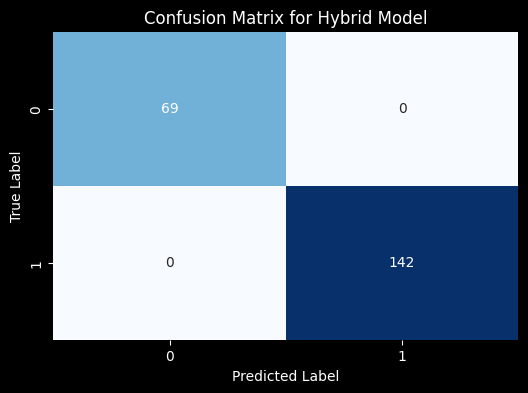

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (assuming you already have X and y defined)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_estimators = [
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

# Define stacking model with Logistic Regression as the meta-model
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Hybrid Model (Logistic Regression + Random Forest) Accuracy: {accuracy:.2f}")

# Detailed evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Hybrid Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


StackingClassifier(cv=5,
                   estimators=[('Logistic Regression',
                                LogisticRegression(random_state=42)),
                               ('LDA', LinearDiscriminantAnalysis()),
                               ('KNN', KNeighborsClassifier()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('Gaussian NB', GaussianNB()),
                               ('SVM', SVC(probability=True, random_state=42)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=42)),
                               ('XGBoost',
                                XGB...
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('AdaBoost',
                                AdaBoostClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

Stacking Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix for Stacking Model')

Text(0.5, 14.722222222222216, 'Predicted Label')

Text(45.722222222222214, 0.5, 'True Label')

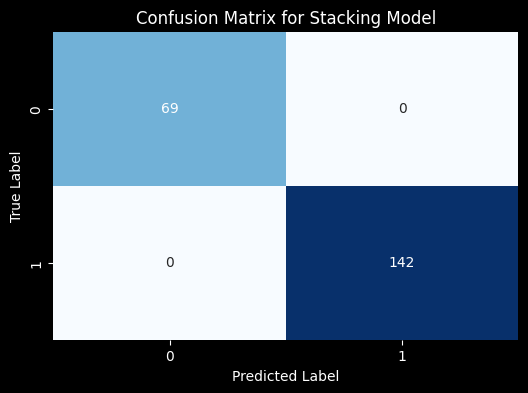

LogisticRegression(random_state=42)

LinearDiscriminantAnalysis()

KNeighborsClassifier()

DecisionTreeClassifier()

GaussianNB()

SVC(probability=True, random_state=42)

RandomForestClassifier(random_state=42)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

GradientBoostingClassifier(random_state=42)

AdaBoostClassifier(random_state=42)

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 11 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Stacking Model'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'LDA'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'Decision Tree'),
  Text(5, 0, 'Gaussian NB'),
  Text(6, 0, 'SVM'),
  Text(7, 0, 'Random Forest'),
  Text(8, 0, 'XGBoost'),
  Text(9, 0, 'Gradient Boosting'),
  Text(10, 0, 'AdaBoost')])

Text(0.5, 0, 'Model')

Text(0, 0.5, 'Accuracy Score')

Text(0.5, 1.0, 'Accuracy Comparison: Base Models vs Stacking Model')

(0.0, 1.0)

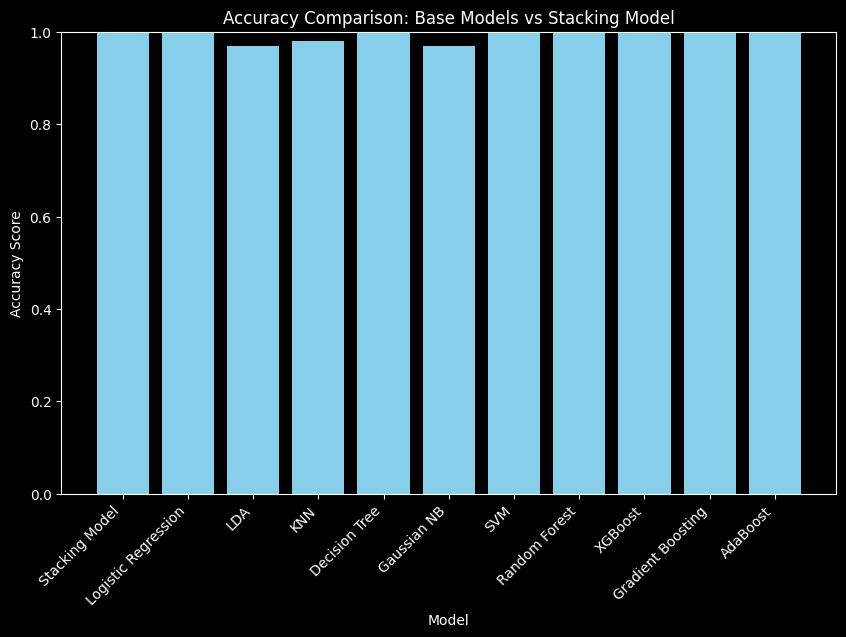

Accuracy Scores for All Models:
Stacking Model: 1.0
Logistic Regression: 1.0
LDA: 0.97
KNN: 0.98
Decision Tree: 1.0
Gaussian NB: 0.97
SVM: 1.0
Random Forest: 1.0
XGBoost: 1.0
Gradient Boosting: 1.0
AdaBoost: 1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Split data into training and test sets (assuming X and y are defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_estimators = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('SVM', SVC(probability=True, random_state=42)),  # SVM with probability=True for compatibility
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]

# Define stacking model with Logistic Regression as the meta-model
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(), cv=5)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 2)

print(f"Stacking Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Stacking Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Compare accuracies of individual models and the stacking model
accuracies = {'Stacking Model': accuracy}

for name, model in base_estimators:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test)
    acc = round(accuracy_score(y_test, y_hat_test), 2)
    accuracies[name] = acc

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Comparison: Base Models vs Stacking Model")
plt.ylim(0, 1)
plt.show()

print("Accuracy Scores for All Models:")
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc}")
